#  ML PROJECT
##       GOLD  PRICE PREDICTION 

In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [6]:
# print first 5 rows in the dataframe
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# data info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
correlation = gold_data.corr()

<AxesSubplot:>

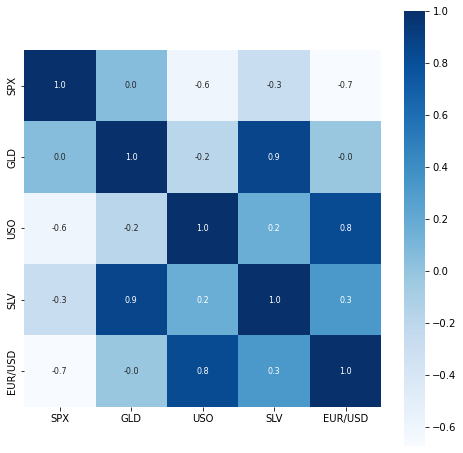

In [9]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\RANJAN KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

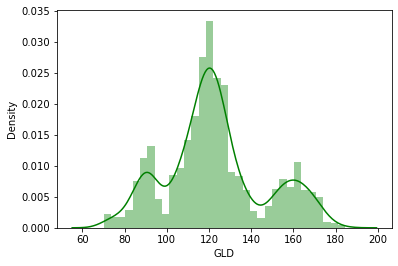

In [14]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [15]:
#Splitting the Features and Target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
#Splitting into Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [40]:
#model training
model = RandomForestRegressor(n_estimators=100)

In [41]:
# training the model
model.fit(X_train,Y_train)

RandomForestRegressor()

In [42]:
#model evaluation
# prediction on Test Data
test_data_prediction = model.predict(X_test)

In [43]:
print(test_data_prediction)

[168.80409977  81.94009991 116.10660017 127.68220091 120.66770154
 154.81749801 150.16559825 126.04690015 117.45569872 126.17130013
 116.46150123 172.32970076 142.00319816 167.92309816 115.21549999
 117.69660062 139.1975029  170.18820092 159.74720358 155.87299913
 155.11159997 125.22839961 176.22159953 157.16760332 125.19140041
  93.6242998   77.87380022 120.52559995 119.23669973 167.44709929
  88.09580016 125.21260004  91.14780101 117.70110025 121.1137992
 136.00810127 115.56970096 115.0534006  148.62120024 107.18870106
 104.24800252  87.10129796 126.47480087 118.2459001  152.20909881
 119.54290018 108.42839975 108.28899811  93.16600039 127.23529738
  74.66270035 113.60559932 121.53030016 111.15589935 118.9142988
 120.82529931 159.32530112 167.61670164 147.11959685  85.79799866
  94.27860037  86.65579876  90.49159991 118.69070086 126.41650036
 127.65759993 169.91709973 122.31399901 117.38639874  98.75200042
 167.52110172 142.83949838 132.13590262 120.96670222 121.14269962
 119.8299006

In [44]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888392523838178


In [47]:
#Compare the Actual Values and Predicted Values in a Plot
Y_test = list(Y_test)

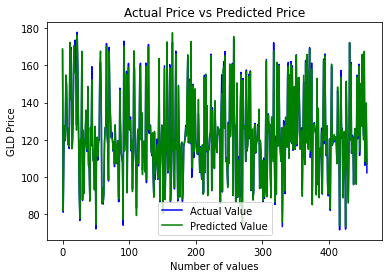

In [48]:
# visualisation of Actual price vs Predicted price
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [49]:
#Testing scores
testing_test_data_prediction = model.score(X_test, Y_test)
print("Model Score/Performance on Testing data",testing_test_data_prediction)


Model Score/Performance on Testing data 0.9888392523838178


In [50]:
training__test_data_prediction = model.score(X_train, Y_train)
print("Model Score/Performance on Training data",training__test_data_prediction)

Model Score/Performance on Training data 0.9983963812102966


In [51]:
# Checking working of the model
input_data=(1447.160034 , 78.470001 , 15.1800 , 1.471692)
input_array=np.asarray(input_data)
reshape_data =input_array.reshape(1,-1)
new_pred =model.predict(reshape_data)
print('Price of GOLD predicted by the model : = ')
print(new_pred)

Price of GOLD predicted by the model : = 
[84.97980009]


#                           THANK YOU